### Project :   Game Streamer Analysis
### Author :    Sanjoy Kumar
### Email :      sanjoy.eee32@gmail.com
### Portfolio : imsanjoykb.github.io

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import missingno as msno
from collections import Counter

## Import Data Source

In [2]:
data_source =  'Maingames_DS_dataset.csv'
df = pd.read_csv(data_source, index_col="Unnamed: 0")
df.head(5)

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,0.471456,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,0.493514,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,0.472405,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,ID,Male,MLBB,142037,127,0.005171,0.677222,0.603534,0.407923,0.467787,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,ID,Male,Free Fire - Battlegrounds,15416,86,0.001213,0.238194,0.543285,0.392993,0.583099,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


## Data Internal Insights

In [3]:
df.shape

(631, 126)

In [4]:
df.isnull().sum()

Country                                 0
Gender                                  1
Game                                    2
Total Follower                          1
Broadcast Hours                         0
                                       ..
Character_Facet_Cont_Cautiousness       0
Role_Curator                            0
Personal_Values_Cont_Conservation       0
Self_Esteem_Cont_SELevelIntelligence    0
Temperament_Centric                     0
Length: 126, dtype: int64

In [5]:
df.describe()

,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,Character_Facet_Cont_Sympathy,Personal_Values_Facet_Cont_UniversalismTolerance,Temperament_Choleric,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
count,631.000000,629.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,...,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,127.870048,0.012047,0.602272,0.511264,0.504968,0.495829,0.475071,0.398333,0.558301,0.192155,...,0.486182,0.483384,0.354377,0.628526,0.498150,0.509117,0.264708,0.299209,0.769686,0.330626
std,53.127032,0.103878,0.098965,0.132756,0.110216,0.099318,0.089500,0.093354,0.095576,0.215062,...,0.072933,0.133083,0.052241,0.113400,0.095051,0.132999,0.115095,0.007841,0.059291,0.231695
min,0.000000,0.000000,0.238194,0.092290,0.203574,0.176896,0.192784,0.136315,0.234030,0.000000,...,0.333361,0.089912,0.153680,0.342775,0.214129,0.131429,0.000000,0.267636,0.302305,0.000000
25%,92.000000,0.000910,0.548895,0.378814,0.438643,0.437895,0.418463,0.350123,0.510763,0.000000,...,0.429169,0.397342,0.329644,0.523061,0.412747,0.387027,0.179912,0.292658,0.742862,0.125000
50%,113.000000,0.002594,0.592589,0.523694,0.538550,0.505687,0.488704,0.389375,0.552733,0.250000,...,0.471135,0.474822,0.341652,0.660061,0.496871,0.512096,0.247404,0.301182,0.776426,0.250000
75%,151.500000,0.007003,0.668015,0.615077,0.571307,0.567108,0.523962,0.450524,0.625677,0.250000,...,0.544211,0.586773,0.377048,0.721947,0.555224,0.613752,0.367443,0.304341,0.807230,0.500000
max,571.000000,2.561621,0.869732,0.803543,0.853163,0.783423,0.732078,0.677443,0.842938,1.000000,...,0.671015,0.832664,0.598359,0.838676,0.786141,0.910022,0.601515,0.323636,0.897407,1.000000


## Data Cleaning

In [6]:
# Drop NA value (value = '-')
df = df[df.Game != '-']
df = df[df.Game != 'No MLBB Video']
# Merge same game name
 # Arena of Valor
df['Game'] = df['Game'].replace(['Garena Liên Quân Mobile','Liên Quân Mobile'],'Arena of Valor')
 # Age of Empires
df['Game'] = df['Game'].replace(['Agge of Empires'],'Age of Empires')
 # Audition online
df['Game'] = df['Game'].replace(['Audition'],'Audition Online')
df['Game'] = df['Game'].replace(['Call of Duty: Mobile VN'],'Call of Duty: Mobile')
df['Total Follower'] = df['Total Follower'].replace(['250,98'],25098)

# change datatype
df['Total Follower'] = pd.to_numeric(df['Total Follower'])

# Other
df['PaidStarPerWatchedHourPerFollower'] = df['PaidStarPerWatchedHour']/df['Total Follower']


In [7]:
# Show all games
for game in df.groupby('Game').groups.keys():
  print(game)
df.groupby('Game').groups.keys()
df.groupby('Game').count().iloc[:,0].shape


8 Ball Pool
Age of Empires
Apex Legends
Arena of Valor
Assassin's Creed Odyssey
Audition Online
Auto Chess
Blade & Soul
CABAL ONLINE
Call of Duty: Mobile
Call of Duty: Warzone
Coin Master
Counter-Strike: Global Offensive
Crazy Kart
Crossfire
Days Gone
Dead by Daylight
Dota 2
EA Sports UFC 3
Euro Truck Simulator 2
FIFA Online 4
Five Nights at Freddy's 2
Free Fire - Battlegrounds
God of War
Grand Theft Auto V
Green Hell
Identity V
J-League Jikkyou Winning Eleven
League of Legends
League of Legends: Wild Rift
Little Big Snake
MLBB
MU Online
Minecraft
Moon of Madness
MotoGP
NBA 2K20
Naruto Shippuden: Ultimate Ninja Storm 4
Ngọc Rồng Online
PUBG
Persona 5 Royal
Point Blank Indonesia
RULES OF SURVIVAL
Ragnarok M: Eternal Love
Roblox
Sea of Thieves
Star Wars Jedi: Fallen Order
Teamfight Tactics
The Last of Us
The Last of Us: Part II
The Warriors
Township Mobile
Valorant
World War Z
Wormate.io
Worms Zone
Yakuza: Kiwami 2
eFootball PES 2020


(58,)

In [8]:
# Generate game count
df_game_count = df.groupby('Game').count().sort_values('Country', ascending=False).iloc[:, 0:1].rename(columns={'Country':'Count'})
# df_game_count.head(10)


## Check Per Followers

In [9]:
cols = ['Total Follower','PaidStarPerWatchedHour'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = df[condition]
filtered_df.shape

(491, 127)

<AxesSubplot:xlabel='Total Follower', ylabel='PaidStarPerWatchedHourPerFollower'>

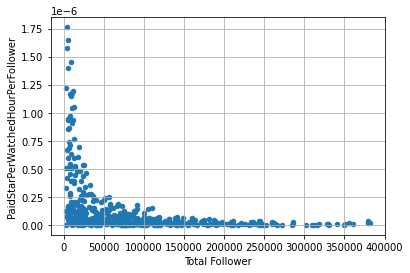

In [10]:
filtered_df[['Total Follower', 'PaidStarPerWatchedHourPerFollower']].plot(x='Total Follower', y='PaidStarPerWatchedHourPerFollower', grid=True, kind='scatter')

In [11]:
# select data of PaidStarPerWatchedHourPerFollower in Q3-Q4
cols = ['PaidStarPerWatchedHourPerFollower']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
condition = (df[cols]>Q3).any(axis=1)
df_filtered_by_PSPWPF = df[condition]

In [12]:
c = df_filtered_by_PSPWPF.corr()
c['PSPW_abs'] = c['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
c_rank = c[['PaidStarPerWatchedHour', 'PSPW_abs']].sort_values('PSPW_abs', ascending=False)[c['PSPW_abs'] > c['PSPW_abs'].mean()]
c_rank = c_rank.iloc[3:]
c_rank.head(10)


/home/eclbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,PaidStarPerWatchedHour,PSPW_abs
Role_Philanthropist,-0.282005,0.282005
Role_Manager,-0.254636,0.254636
Character_Cont_Conscientiousness,-0.245829,0.245829
Character_Facet_Cont_AchievementStriving,-0.245191,0.245191
Role_Marshal,-0.237801,0.237801
Personal_Values_Facet_Cont_Hedonism,0.236380,0.236380
Character_Cont_Openness,-0.230269,0.230269
Role_Commander,-0.228296,0.228296
Character_Facet_Cont_Morality,0.221398,0.221398
Personal_Values_Facet_Cont_ConformityRules,-0.215039,0.215039


## Correlation Matrix with General Data 

In [13]:
corr_matrix = df.corr()
corr_matrix['PSPW_abs'] = corr_matrix['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
corr_core = corr_matrix[['PaidStarPerWatchedHour', 'PSPW_abs']]


In [14]:
corr_core.sort_values('PSPW_abs', ascending=False).head(10)


,PaidStarPerWatchedHour,PSPW_abs
PaidStarPerWatchedHour,1.000000,1.000000
PaidStarPerWatchedHour.1,1.000000,1.000000
PaidStarPerWatchedHourPerFollower,0.945065,0.945065
Personal_Values_Facet_Cont_Hedonism,0.142095,0.142095
Role_Philanthropist,-0.140508,0.140508
Personal_Values_Facet_Cont_ConformityRules,-0.140314,0.140314
Character_Facet_Cont_AchievementStriving,-0.134136,0.134136
Role_Manager,-0.130683,0.130683
Character_Cont_Conscientiousness,-0.126654,0.126654
Role_Marshal,-0.116596,0.116596


## Divide into several group: Country, Game, Genger

In [15]:
# Distribution of VN, PUBG, Male
vpm = df.loc[df['Game'] == 'PUBG'].loc[df['Country'] == 'VN'].loc[df['Gender'] == 'Male']
test_corr = vpm.corr()
test_corr['PSPW_abs'] = test_corr['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
test_corr = test_corr[['PaidStarPerWatchedHour', 'PSPW_abs']]
test_corr


,PaidStarPerWatchedHour,PSPW_abs
Total Follower,-0.195180,0.195180
Broadcast Hours,0.220304,0.220304
PaidStarPerWatchedHour,1.000000,1.000000
Character_Facet_Cont_Rigidity,-0.099999,0.099999
Character_Facet_Cont_AchievementStriving,0.079238,0.079238
...,...,...
Role_Curator,0.174295,0.174295
Personal_Values_Cont_Conservation,0.126991,0.126991
Self_Esteem_Cont_SELevelIntelligence,0.114209,0.114209
Temperament_Centric,-0.020632,0.020632


<AxesSubplot:>

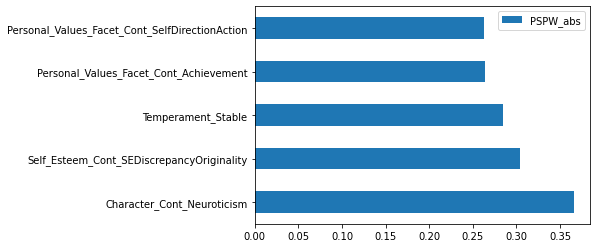

In [16]:
# select data of PaidStarPerWatchedHourPerFollower in Q3-Q4
cols = ['PSPW_abs']
Q3 = test_corr[cols].quantile(0.75)
condition = (test_corr[cols]>Q3).any(axis=1)
test_corr = test_corr[condition]
test_corr = test_corr.sort_values('PSPW_abs',ascending= False).iloc[3:,1:]
test_corr
test_corr.head(5).plot(kind='barh')


In [17]:
# Distribution of VN, PUBG, Female
vpf = df.loc[df['Game'] == 'PUBG'].loc[df['Country'] == 'VN'].loc[df['Gender'] == 'Female']
test_corr_f = vpf.corr()
test_corr_f['PSPW_abs'] = test_corr_f['PaidStarPerWatchedHour'].apply(lambda x: abs(x))
test_corr_f = test_corr_f[['PaidStarPerWatchedHour', 'PSPW_abs']]
test_corr_f

,PaidStarPerWatchedHour,PSPW_abs
Total Follower,-0.160742,0.160742
Broadcast Hours,0.074013,0.074013
PaidStarPerWatchedHour,1.000000,1.000000
Character_Facet_Cont_Rigidity,-0.387625,0.387625
Character_Facet_Cont_AchievementStriving,0.008814,0.008814
...,...,...
Role_Curator,-0.200469,0.200469
Personal_Values_Cont_Conservation,-0.347054,0.347054
Self_Esteem_Cont_SELevelIntelligence,0.367693,0.367693
Temperament_Centric,0.172117,0.172117


/home/eclbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:>

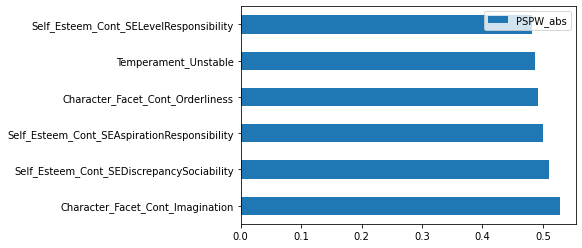

In [18]:
# select data of PaidStarPerWatchedHourPerFollower in Q3-Q4
cols = ['PSPW_abs']
Q3 = test_corr_f[cols].quantile(0.75)
condition = (test_corr_f[cols]>Q3).any(axis=1)
test_corr_f = test_corr_f[condition]
test_corr_f = test_corr_f.sort_values('PSPW_abs',ascending= False)[test_corr_f['PSPW_abs'] > test_corr_f['PSPW_abs'].mean()].iloc[3:,1:]
test_corr_f.plot(kind='barh')


Country
ID    0.000022
PH    0.000202
VN    0.000025
Name: PaidStarPerWatchedHour, dtype: float64


<AxesSubplot:ylabel='Country'>

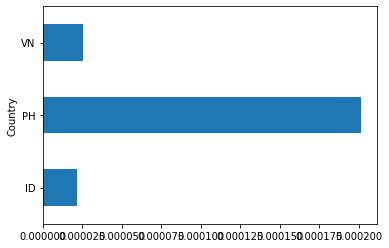

In [19]:
# print(df.groupby('Country').mean()['PaidStarPerWatchedHour'])
print(df.groupby('Country').mean()['PaidStarPerWatchedHour']/df.groupby('Country').count()['PaidStarPerWatchedHour'])
(df.groupby('Country').mean()['PaidStarPerWatchedHour']/df.groupby('Country').count()['PaidStarPerWatchedHour']).plot(kind='barh')


<AxesSubplot:ylabel='Country'>

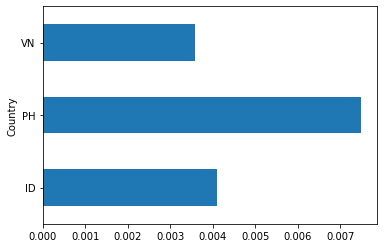

In [20]:
df[df['Gender'] == 'Male'].groupby('Country').mean()['PaidStarPerWatchedHour'].plot(kind='barh')


<AxesSubplot:ylabel='Country'>

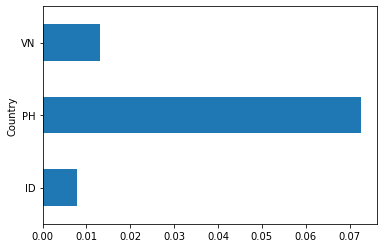

In [21]:
df[df['Gender'] == 'Female'].groupby('Country').mean()['PaidStarPerWatchedHour'].plot(kind='barh')


<AxesSubplot:ylabel='Gender'>

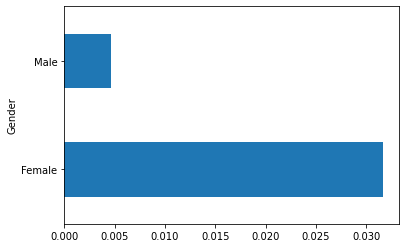

In [22]:
df.groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')


<AxesSubplot:ylabel='Gender'>

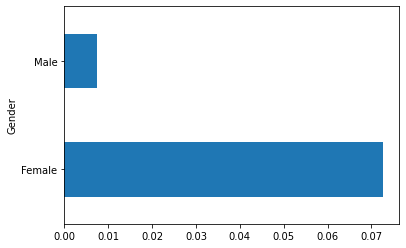

In [23]:
df[df['Country'] == 'PH'].groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')


Gender
Female    0.000183
Male      0.000010
Name: PaidStarPerWatchedHour, dtype: float64


<AxesSubplot:ylabel='Gender'>

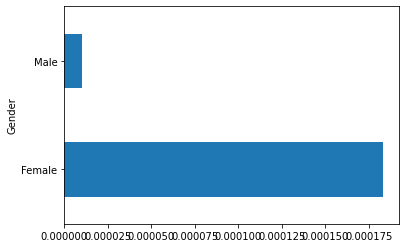

In [24]:
print(df.groupby('Gender').mean()['PaidStarPerWatchedHour']/df.groupby('Gender').count()['PaidStarPerWatchedHour'])
(df.groupby('Gender').mean()['PaidStarPerWatchedHour']/df.groupby('Gender').count()['PaidStarPerWatchedHour']).plot(kind='barh')


<AxesSubplot:ylabel='Gender'>

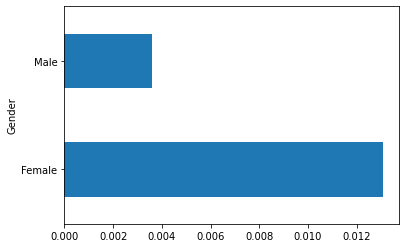

In [25]:
df[df['Country'] == 'VN'].groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')


<AxesSubplot:ylabel='Gender'>

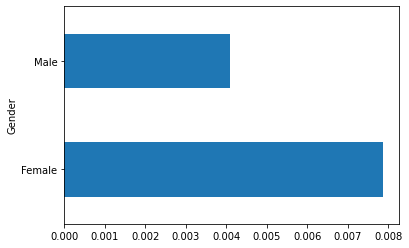

In [26]:
df[df['Country'] == 'ID'].groupby('Gender').mean()['PaidStarPerWatchedHour'].plot(kind='barh')


## Thank you